In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline

In [3]:
train = pd.read_csv('C:/Users/Mr Bombastic/Downloads/Impp/Internship tasks/Machine Learning/Task 1 Titanic Machine Learning from Disaster/train.csv',index_col='PassengerId')

In [4]:
test = pd.read_csv('C:/Users/Mr Bombastic/Downloads/Impp/Internship tasks/Machine Learning/Task 1 Titanic Machine Learning from Disaster/test.csv',index_col='PassengerId')

In [5]:
test_target = pd.read_csv('C:/Users/Mr Bombastic/Downloads/Impp/Internship tasks/Machine Learning/Task 1 Titanic Machine Learning from Disaster/gender_submission.csv',index_col='PassengerId')

In [6]:
test = test.merge(test_target,on=['PassengerId'],how='outer')

### Feature Engineering and EDA

In [7]:
train.shape

(891, 11)

In [8]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
test.shape

(418, 11)

In [10]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [11]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [12]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [14]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


### Imputing And Removing Null Values

In [16]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Survived      0
dtype: int64

<Axes: ylabel='PassengerId'>

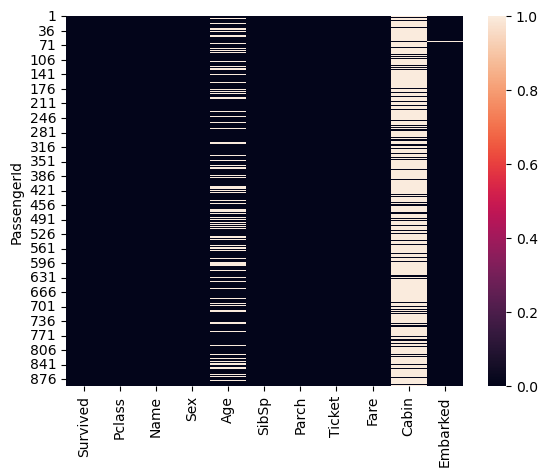

In [18]:
sns.heatmap(train.isnull())

<Axes: ylabel='PassengerId'>

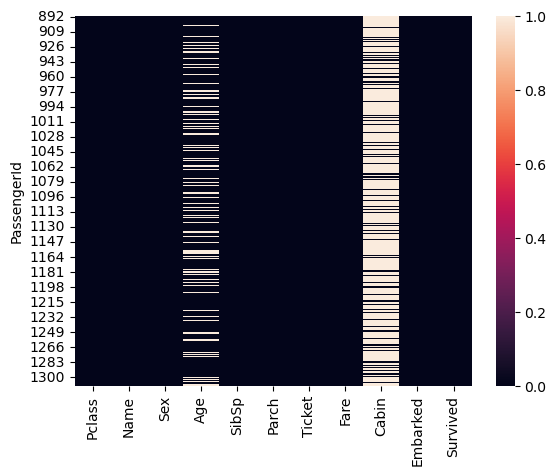

In [19]:
sns.heatmap(test.isna())

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
test.drop('Cabin',axis=1,inplace=True)

In [22]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

In [23]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [24]:
test.dropna(inplace=True)

In [25]:
train['Age'].fillna(train.Age.mean(),inplace=True)

In [26]:
test.Age.fillna(test.Age.mean(),inplace=True)

In [27]:
train['Embarked'].fillna('C',inplace=True)

In [28]:
train.Age = train.Age.astype('int')
test.Age = test.Age.astype('int')

### Encoding

In [29]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [30]:
test.Sex.unique()

array(['male', 'female'], dtype=object)

In [31]:
train = pd.get_dummies(train,columns=['Sex'],drop_first=True)
test = pd.get_dummies(test,columns=['Sex'],drop_first=True)

In [32]:
train = pd.get_dummies(train,columns=['Embarked'],drop_first=True)
test = pd.get_dummies(test,columns=['Embarked'],drop_first=True)

In [33]:
train.Embarked_Q = train.Embarked_Q.astype('int')
train.Embarked_S =train.Embarked_S.astype('int')
train.Sex_male = train.Sex_male.astype('int')

test.Sex_male = test.Sex_male.astype('int')
test.Embarked_Q =test.Embarked_Q.astype('int')
test.Embarked_S =test.Embarked_S.astype('int')

<Axes: >

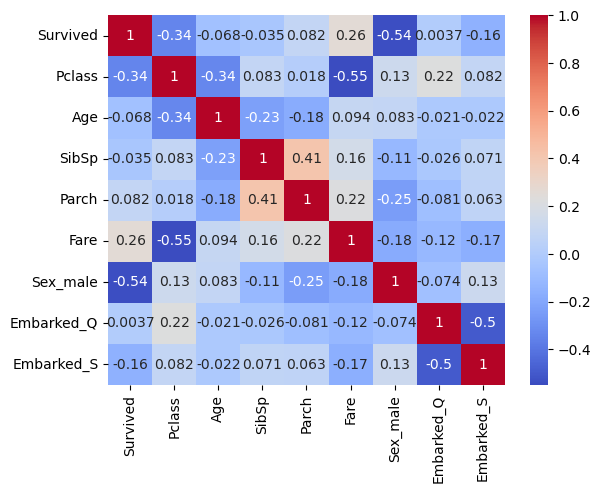

In [34]:
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

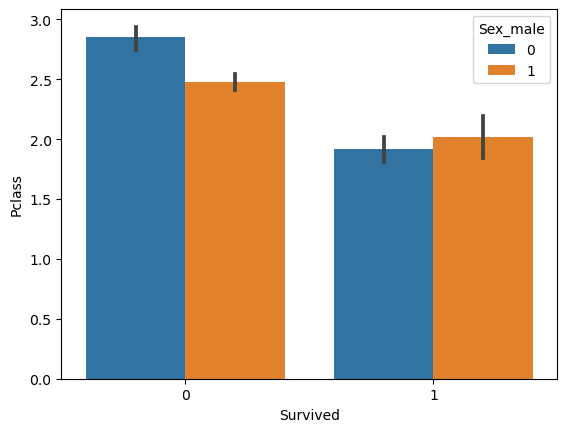

In [35]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.barplot(train,x='Survived',y='Pclass',hue='Sex_male')

### Removing Outliers For Training Data

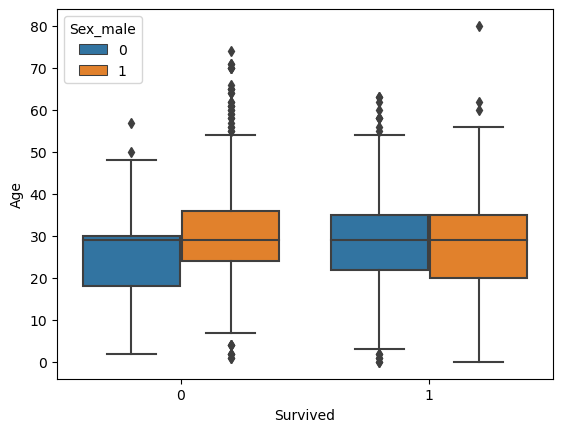

In [36]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning) #Remove un-wanted warnings
    sns.boxplot(x='Survived',y='Age',data=train,hue='Sex_male')

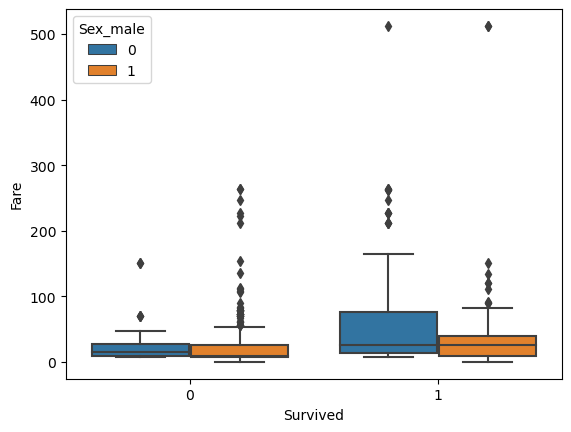

In [37]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning) #Remove un-wanted warnings
    sns.boxplot(x='Survived',y='Fare',data=train,hue='Sex_male')

In [38]:
Q1 = train["Fare"].quantile(0.25)
Q3 = train['Fare'].quantile(0.95)

IQR = Q3 - Q1
fare_outliers = ((train['Fare'] < (Q1 - 1.5 * IQR)) | (train['Fare'] > (Q3 + 1.5 * IQR)))

In [39]:
train = train[~fare_outliers]

### Removing Outliers For Testing Data

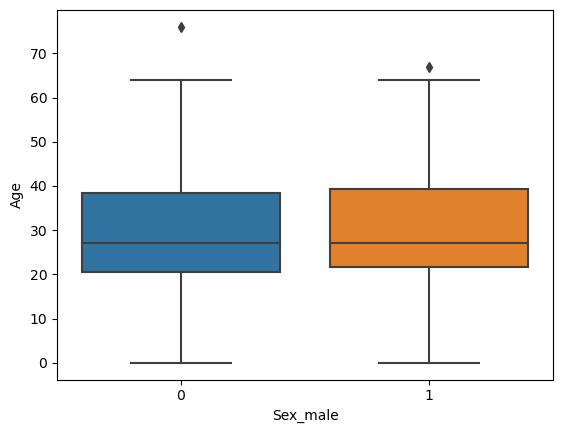

In [40]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning) #Remove un-wanted warnings
    sns.boxplot(x='Sex_male',y='Age',data=test)

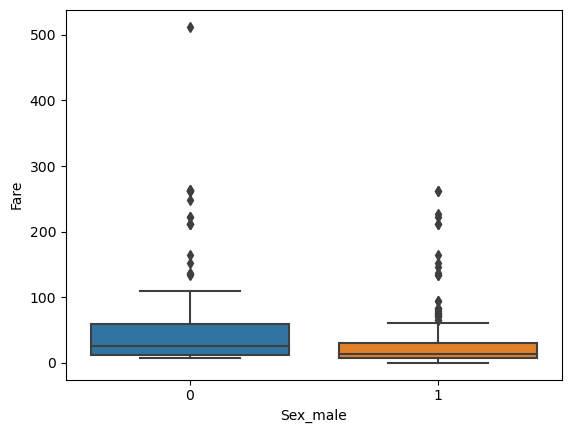

In [41]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning) #Remove un-wanted warnings
    sns.boxplot(x='Sex_male',y='Fare',data=test)

In [42]:
test_Q1 = test["Fare"].quantile(0.25)
test_Q3 = test['Fare'].quantile(0.95)

test_IQR = test_Q3 - test_Q1
test_fare_outliers = ((test['Fare'] < (test_Q1 - 1.5 * test_IQR)) | (test['Fare'] > (test_Q3 + 1.5 * test_IQR)))
test = test[~test_fare_outliers]

In [43]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22,1,0,7.2500,1,0,1
2,1,1,38,1,0,71.2833,0,0,0
3,1,3,26,0,0,7.9250,0,0,1
4,1,1,35,1,0,53.1000,0,0,1
5,0,3,35,0,0,8.0500,1,0,1


In [44]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
892,3,34,0,0,7.8292,0,1,1,0
893,3,47,1,0,7.0000,1,0,0,1
894,2,62,0,0,9.6875,0,1,1,0
895,3,27,0,0,8.6625,0,1,0,1
896,3,22,1,1,12.2875,1,0,0,1


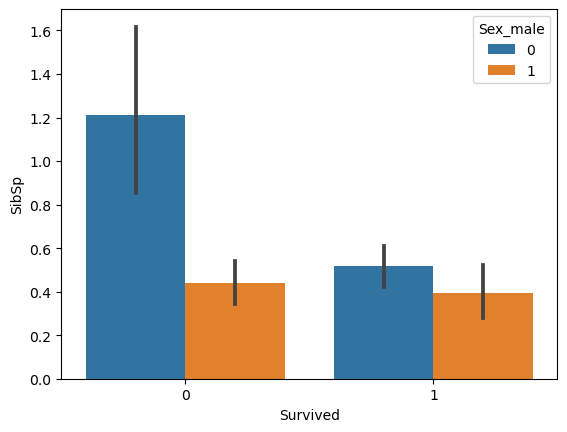

In [45]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.barplot(x='Survived',y='SibSp',data=train,hue='Sex_male')

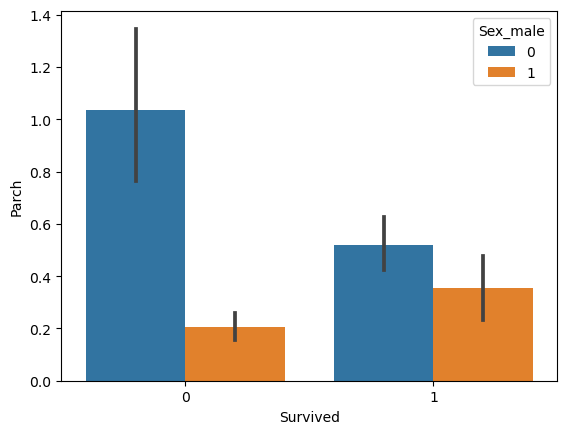

In [46]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    sns.barplot(x='Survived',y='Parch',data=train,hue='Sex_male')

### Model Training

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [48]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [49]:
X_test = test.drop('Survived',axis=1)
y_test = test['Survived']

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

C:\Users\Mr Bombastic\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Mr Bombastic\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Mr Bombastic\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Mr Bombastic\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, p

In [51]:
X_test_scaled = scaler.transform(X_test)

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

In [53]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

In [54]:
y_pred = lr_model.predict(X_test_scaled)
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.validation")

### Model Evaluation

In [55]:
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix

In [56]:
f1_sc = f1_score(y_test,y_pred)
prec_score = precision_score(y_test,y_pred)
recall_sc = recall_score(y_test,y_pred)
acc_score = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

print(f"Accuracy Score: {acc_score}")
print(f"F1 Score: {f1_sc}")
print(f"Precision Score: {prec_score}")
print(f"Recall: {recall_sc}")

Accuracy Score: 0.9395770392749244
F1 Score: 0.923076923076923
Precision Score: 0.9022556390977443
Recall: 0.9448818897637795


<Axes: >

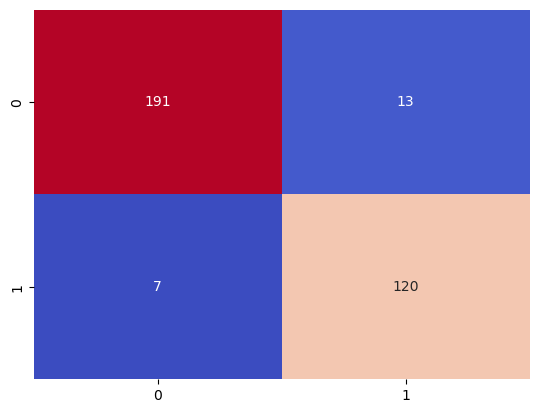

In [57]:
sns.heatmap(conf_matrix,fmt='d',annot=True,cmap='coolwarm',cbar=False)

### Model Tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid ={
            'C': np.logspace(-3, 3, 7),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }

In [80]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters for : {best_params}")
print(f"Accuracy on Test Set: {accuracy}")

Best Hyperparameters for : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Set: 0.9425981873111783


In [82]:
tuned_model = LogisticRegression(C=0.1,penalty='l2',solver='liblinear')

In [83]:
tuned_model.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [84]:
new_pred = tuned_model.predict(X_test_scaled)

In [85]:
tune_f1_sc = f1_score(y_test,new_pred)
tune_prec_score = precision_score(y_test,new_pred)
tune_recall_sc = recall_score(y_test,new_pred)
tune_acc_score = accuracy_score(y_test,new_pred)
tune_conf_matrix = confusion_matrix(y_test,new_pred)

print(f"Accuracy Score: {tune_acc_score}")
print(f"F1 Score: {tune_f1_sc}")
print(f"Precision Score: {tune_prec_score}")
print(f"Recall: {tune_recall_sc}")

Accuracy Score: 0.9486404833836858
F1 Score: 0.9348659003831418
Precision Score: 0.9104477611940298
Recall: 0.9606299212598425


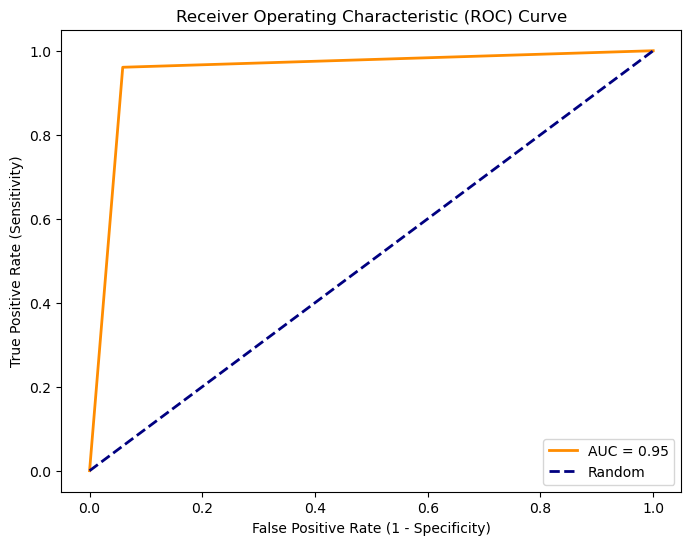

AUC-ROC Score: 0.95


In [86]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,new_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC Score: {roc_auc_score(y_test, new_pred):.2f}')


<Axes: >

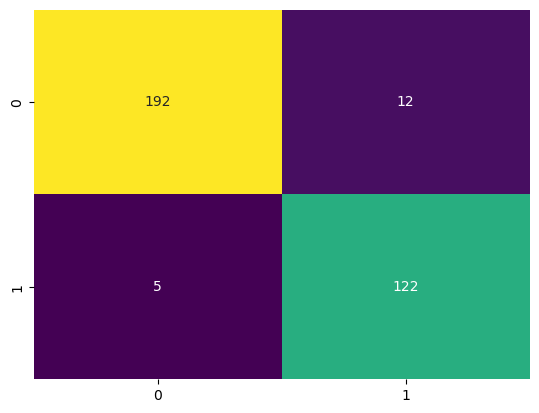

In [88]:
sns.heatmap(tune_conf_matrix,cmap='viridis',cbar=False,annot=True,fmt='d')

## END